In [130]:
with open(f"10.txt", "r") as file:
    data = file.read().strip()

In [131]:
data = """.....
.S-7.
.|.|.
.L-J.
....."""

In [132]:
# clearer visualization

ugly_map = data


def fancify_map(map):
    fancify_dict = dict(zip("|-LJ7F.S", "║═╚╝╗╔·S"))
    fancy_map = map
    for key, value in fancify_dict.items():
        fancy_map = fancy_map.replace(key, value)
    return fancy_map


fancy_map = fancify_map(data)

# with open("10-fancy_map.txt", "w", encoding='utf-8') as file:
#     file.write(fancy_pipes_map)

In [133]:
# puzzle 1

def find_next_position(position, text_map, came_from=None):

    row_length = text_map.find('\n')
    current_pipe = text_map[position]
    next_positions = []
    
    # east
    east_position = position+1
    if east_position > len(text_map):
        east_position -= len(text_map)
    east_pipe = text_map[east_position]
    if east_pipe in '═╝╗S' and current_pipe in '═╚╔S':
        next_positions.append(east_position)

    # north
    north_position = position-row_length-1
    if north_position > len(text_map):
        north_position -= len(text_map)
    north_pipe = text_map[north_position]
    if north_pipe in '║╗╔S' and current_pipe in '║╚╝S':
        next_positions.append(north_position)

    # west
    west_position = position-1
    if west_position > len(text_map):
        west_position -= len(text_map)
    west_pipe = text_map[west_position]
    if west_pipe in '═╚╔S' and current_pipe in '═╝╗S':
        next_positions.append(west_position)

    # south
    south_position = position+row_length+1
    if south_position > len(text_map):
        south_position -= len(text_map)
    south_pipe = text_map[south_position]
    if south_pipe in '║╚╝S' and current_pipe in '║╗╔S':
        next_positions.append(south_position)

    next_positions = [item for item in next_positions if item != came_from]
    next_positions = [item if item < len(text_map) else item-len(text_map) for item in next_positions]

    return next_positions

def get_loop(map):

    loop_positions = [map.find('S')]

    next_position = find_next_position(loop_positions[-1],map)[0]
    loop_positions.append(next_position)
    
    while loop_positions[-1] != loop_positions[0]:
        next_position = find_next_position(loop_positions[-1],map, loop_positions[-2])[0]
        loop_positions.append(next_position)
    
    return loop_positions[:-1]

loop = get_loop(fancy_map)
step_count = len(loop)
print((step_count+1)//2)

4


In [134]:
data = """FF7FSF7F7F7F7F7F---7
L|LJ||||||||||||F--J
FL-7LJLJ||||||LJL-77
F--JF--7||LJLJIF7FJ-
L---JF-JLJIIIIFJLJJ7
|F|F-JF---7IIIL7L|7|
|FFJF7L7F-JF7IIL---7
7-L-JL7||F7|L7F-7F7|
L.L7LFJ|||||FJL7||LJ
L7JLJL-JLJLJL--JLJ.L"""

In [135]:
fancy_map = fancify_map(data)
print(fancy_map)

╔╔╗╔S╔╗╔╗╔╗╔╗╔╗╔═══╗
╚║╚╝║║║║║║║║║║║║╔══╝
╔╚═╗╚╝╚╝║║║║║║╚╝╚═╗╗
╔══╝╔══╗║║╚╝╚╝I╔╗╔╝═
╚═══╝╔═╝╚╝IIII╔╝╚╝╝╗
║╔║╔═╝╔═══╗III╚╗╚║╗║
║╔╔╝╔╗╚╗╔═╝╔╗II╚═══╗
╗═╚═╝╚╗║║╔╗║╚╗╔═╗╔╗║
╚·╚╗╚╔╝║║║║║╔╝╚╗║║╚╝
╚╗╝╚╝╚═╝╚╝╚╝╚══╝╚╝·╚


In [136]:
def get_xy(map, position_list):
    row_length = map.find('\n')+1
    x = [item%row_length for item in position_list]
    y = [item//row_length for item in position_list]
    #y = [max(y) - item for item in y]
    return x, y

In [137]:
loop = get_loop(fancy_map)
step_count = len(loop)
print((step_count+1)//2)

80


In [138]:
loop

[4,
 3,
 24,
 23,
 2,
 1,
 22,
 43,
 44,
 45,
 66,
 65,
 64,
 63,
 84,
 85,
 86,
 87,
 88,
 67,
 68,
 69,
 70,
 91,
 90,
 89,
 110,
 109,
 108,
 129,
 128,
 149,
 150,
 151,
 130,
 131,
 152,
 153,
 174,
 173,
 194,
 195,
 196,
 175,
 154,
 133,
 132,
 111,
 112,
 113,
 114,
 115,
 136,
 135,
 134,
 155,
 176,
 197,
 198,
 177,
 156,
 157,
 178,
 199,
 200,
 179,
 158,
 137,
 138,
 159,
 160,
 181,
 180,
 201,
 202,
 203,
 204,
 183,
 182,
 161,
 162,
 163,
 184,
 205,
 206,
 185,
 164,
 165,
 186,
 187,
 166,
 145,
 144,
 143,
 142,
 141,
 120,
 119,
 98,
 99,
 78,
 79,
 100,
 101,
 80,
 81,
 60,
 59,
 58,
 37,
 38,
 39,
 40,
 19,
 18,
 17,
 16,
 15,
 36,
 57,
 56,
 35,
 14,
 13,
 34,
 55,
 76,
 75,
 54,
 33,
 12,
 11,
 32,
 53,
 74,
 73,
 52,
 31,
 10,
 9,
 30,
 51,
 72,
 93,
 92,
 71,
 50,
 29,
 8,
 7,
 28,
 49,
 48,
 27,
 6,
 5,
 26,
 47,
 46,
 25]

In [139]:
from itertools import batched

loop_vectors = {}
row_length = fancy_map.find('\n')+1
for p0, p1 in batched(loop, 2):
    x = (p1-p0)%row_length
    y = p1//row_length - p0//row_length
    loop_vectors[p0] = (x, y)

loop_vectors

{4: (1, 0),
 24: (1, 0),
 2: (1, 0),
 22: (21, 1),
 44: (20, 0),
 66: (1, 0),
 64: (1, 0),
 84: (20, 0),
 86: (20, 0),
 88: (21, -1),
 68: (20, 0),
 70: (21, 1),
 90: (1, 0),
 110: (1, 0),
 108: (21, 1),
 128: (21, 1),
 150: (20, 0),
 130: (20, 0),
 152: (20, 0),
 174: (1, 0),
 194: (20, 0),
 196: (21, -1),
 154: (21, -1),
 132: (21, -1),
 112: (20, 0),
 114: (20, 0),
 136: (1, 0),
 134: (21, 1),
 176: (21, 1),
 198: (21, -1),
 156: (20, 0),
 178: (21, 1),
 200: (21, -1),
 158: (21, -1),
 138: (21, 1),
 160: (21, 1),
 180: (21, 1),
 202: (20, 0),
 204: (21, -1),
 182: (21, -1),
 162: (20, 0),
 184: (21, 1),
 206: (21, -1),
 164: (20, 0),
 186: (20, 0),
 166: (21, -1),
 144: (1, 0),
 142: (1, 0),
 120: (1, 0),
 98: (20, 0),
 78: (20, 0),
 100: (20, 0),
 80: (20, 0),
 60: (1, 0),
 58: (21, -1),
 38: (20, 0),
 40: (21, -1),
 18: (1, 0),
 16: (1, 0),
 36: (21, 1),
 56: (21, -1),
 14: (1, 0),
 34: (21, 1),
 76: (1, 0),
 54: (21, -1),
 12: (1, 0),
 32: (21, 1),
 74: (1, 0),
 52: (21, -1),
 1

In [140]:
no_loop = [item for item in range(len(fancy_map)+1) if item not in loop]
no_loop


[0,
 20,
 21,
 41,
 42,
 61,
 62,
 77,
 82,
 83,
 94,
 95,
 96,
 97,
 102,
 103,
 104,
 105,
 106,
 107,
 116,
 117,
 118,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 139,
 140,
 146,
 147,
 148,
 167,
 168,
 169,
 170,
 171,
 172,
 188,
 189,
 190,
 191,
 192,
 193,
 207,
 208,
 209]

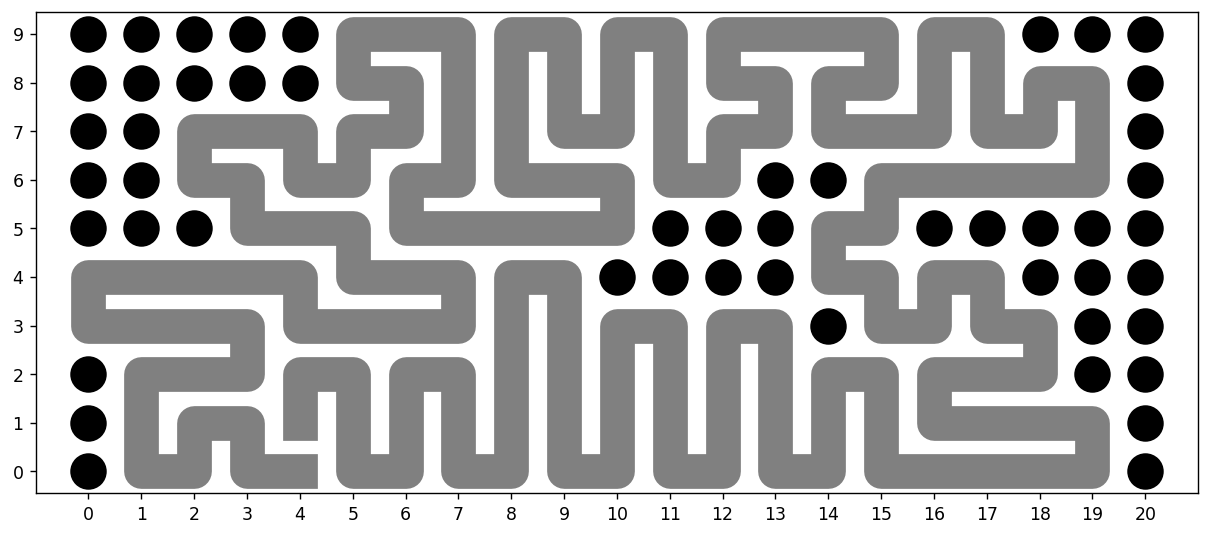

In [141]:
import matplotlib.pyplot as plt


size=20
# loop points
x, y = get_xy(fancy_map, loop)
ratio = max(x)/max(y)
fig, ax = plt.subplots(figsize=(12,int(12/ratio)), dpi=125)
ax.plot(x, y, c='gray', ls='-', linewidth=size, marker='.', markersize=size, alpha=1)

# other points
x, y = get_xy(fancy_map, no_loop)

ax.scatter(x, y, c='black', s=size**2, alpha=1, zorder=100)

ax.set_xticks(range(max(x)+1))
ax.set_yticks(range(max(y)+1))

plt.show()